In [1]:
WIND=False
if WIND: 
    rootf = r"C:\Users\samue"
else:
    rootf = '/home'

In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
# %load_ext autotime

Populating the interactive namespace from numpy and matplotlib


In [3]:
import os as os
import sys
sys.path.append('./extraction_functions') #this is where we put all the functions.py
sys.path.append('./../../functions_PVA') #this is where we put all the functions.py
#from brpylib import *

import matplotlib.pyplot as plt
from numpy               import arange


from extract_triggers import *

from save_load import *

# Load Measurement times

In [4]:
Mtimes = []
Trigs = []

fs=20000

exp=13
time_elapsed = 0
for meas in np.arange(5)+1:
    if WIND: rootF= rootf + r"\OneDrive\Desktop\Data analysis\Exp_mea_07\analysis\pckls_triggers"
    #insert here the path to the pickle triggers of your exp
    else:
        rootF ='/media/eqs8/Samuele_01/Exp_13/analysis/pckls_triggers/'

    if WIND: trigs,ttot= load_obj(rootF + '\exp'+str(exp)+'-meas_0' + str(meas) + '_triggers_unfilt')
    else: trigs,ttot= load_obj(rootF + 'exp'+str(exp)+'-meas_0' + str(meas) + '_triggers_unfilt')
    
    Trigs.append(time_elapsed+trigs/fs)
    Mtimes.append(time_elapsed)
    print(time_elapsed)
    
    time_elapsed+=ttot
Mtimes.append(time_elapsed)
time_elapsed

0
3626.9
11200.7
11870.800000000001
16277.900000000001


19410.100000000002

# Load results from MATLAB

In [6]:
from scipy.io import loadmat

Folder = '/media/eqs8/Samuele_01/Exp_13/analysis/Sam_analysis_trial/Matlab_files_forsta'
#Folder = rootf + r'\OneDrive\Desktop\Data analysis\Exp_mea_01\analysis\pert_DATA\MATLAB_DATA'
matdata = loadmat(Folder + '/checkerboard.data_nocomp.checker.exp13_m5')

In [7]:
# lookup table
exp=13

rootF ='/media/eqs8/Samuele_01/Exp_13/sorting'
#rootF =rootf+r'\OneDrive\Desktop\Data analysis\Exp_mea_01\analysis\exp_sorted\exp1'
#here the folder where there are the results of the sorting


spike_clusters= load(rootF + '/spike_clusters.npy')  

import csv as csv
cgf = open(rootF + '/cluster_group.tsv')  
cgfr = csv.reader(cgf,delimiter="\t") 
cluster_group = dict()
next(cgfr)
for row in cgfr:
    cluster_group[row[0]]=row[1]
Clusters =np.array(list(cluster_group.keys()),dtype='int')

i0=0
iz=len(cluster_group.keys())
#--------------------    
clusid = {}  
clus_count=1
#--------------------    
for i in np.arange(i0,iz):
    
    clus=Clusters[i]
    
    if cluster_group[str(clus)]=='mua' or cluster_group[str(clus)]=='noise' :continue
    clusid[clus_count]=clus
    
    clus_count+=1
clusid

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 6,
 6: 7,
 7: 11,
 8: 16,
 9: 18,
 10: 24,
 11: 26,
 12: 28,
 13: 32,
 14: 38,
 15: 39,
 16: 40,
 17: 41,
 18: 42,
 19: 43,
 20: 44,
 21: 47,
 22: 51,
 23: 54,
 24: 55,
 25: 56,
 26: 58,
 27: 60,
 28: 62,
 29: 64,
 30: 65,
 31: 66,
 32: 67,
 33: 69,
 34: 71,
 35: 72,
 36: 74,
 37: 76,
 38: 77,
 39: 78,
 40: 80,
 41: 83,
 42: 87,
 43: 90,
 44: 91,
 45: 92,
 46: 95,
 47: 96,
 48: 99,
 49: 101,
 50: 102,
 51: 103,
 52: 108,
 53: 111,
 54: 112,
 55: 113,
 56: 120,
 57: 125,
 58: 127,
 59: 128,
 60: 129,
 61: 130,
 62: 132,
 63: 134,
 64: 139,
 65: 140,
 66: 142,
 67: 143,
 68: 144,
 69: 145,
 70: 148,
 71: 149,
 72: 150,
 73: 153,
 74: 154,
 75: 155,
 76: 158,
 77: 159,
 78: 165,
 79: 166,
 80: 167,
 81: 170,
 82: 174,
 83: 175,
 84: 176,
 85: 177,
 86: 178,
 87: 180,
 88: 184,
 89: 185,
 90: 186,
 91: 187,
 92: 190,
 93: 193,
 94: 194,
 95: 197,
 96: 199,
 97: 200,
 98: 202,
 99: 205,
 100: 207,
 101: 208,
 102: 209,
 103: 211,
 104: 214,
 105: 215,
 106: 2

# Plot fitted gaussian and ellipse & RF STA

In [9]:
#Plot neuron

PLOT=True
ZOOM=False

#PDF_folder = rootf +r'\OneDrive\Desktop\Data analysis\Exp_mea_01\analysis\OUTPUT_pert\RF_check'
PDF_folder = '/media/eqs8/Samuele_01/Exp_13/analysis/Sam_analysis_trial/STAs_withellipses/'

RF_fit = {}

ch_size = 60

for id in list(clusid.keys())[0:]:
    neuron=id-1
    coor=matdata['EllipseCoor'][:,neuron]
    
    [X,Y] = meshgrid(np.arange(ch_size), np.arange(ch_size))
    X = X - (ch_size-coor[0])
    Y = Y - (ch_size-coor[1])
    GRF = 1*np.exp(-(X**2)/coor[2] - (Y**2)/coor[3] - coor[4]*X*Y )
    #GRF=GRF[::-1,::-1]
    #-----------------
    fig=figure(figsize=(10,5))
    #-----------------
    
    ax=fig.add_subplot(1,2,1)
    ax.imshow(matdata['Spatial'][::-1,::-1,neuron])
    
    #ax.plot(ch_size-coor[0],ch_size-coor[1],'+',markersize=5,color='k')   #this inserts the x
    
    ellipse_scale=1
    ax.set_xticks([])
    ax.set_yticks([])
    ax.plot((ch_size-matdata['Xell'][:,neuron]-(ch_size-coor[0]))*ellipse_scale+(ch_size-coor[0]),(ch_size-matdata['Yell'][:,neuron]-(ch_size-coor[1]))*ellipse_scale+(ch_size-coor[1]),'w',lw=2)
    
    if ZOOM:
                shift=10
                x0 =ch_size-coor[0]
                y0 = ch_size-coor[1]
                ax.set_xlim([x0-shift,x0+shift])
                ax.set_ylim([y0+shift,y0-shift])
    
    ax=fig.add_subplot(1,2,2)
    ax.imshow(GRF)

    ax.plot(ch_size-matdata['Xell'][:,neuron],ch_size-matdata['Yell'][:,neuron],'w',lw=2)
    ax.plot(ch_size-coor[0],ch_size-coor[1],'+',markersize=5,color='k')
    ax.set_xticks([])
    ax.set_yticks([])

    
    
    #------------------------    
    RF_fit[clusid[id]] = [[ch_size-coor[0],ch_size-coor[1]],[ch_size-matdata['Xell'][:,neuron],ch_size-matdata['Yell'][:,neuron]]]
    
    if PLOT:
        if ZOOM:
            fsave = PDF_folder +'clus' +str(clusid[id]) +'_RF_STA_check_zoom' 
        else:
            fsave = PDF_folder +'clus' +str(clusid[id]) +'_RF_STA_check' 
    
    fig.savefig(fsave+'.png',format='png',dpi=110)
    close(fig)  
        
    i+=1

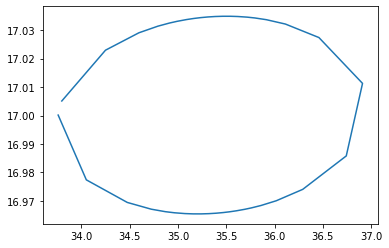

In [22]:
plt.plot(RF_fit[13][1][0], RF_fit[13][1][1])
#for each cluster number it contains:the coordinates of the centre, and the parameters of the fitted ellipse

In [10]:
list(clusid.keys())[0:]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172]

### I superimpose the ellipse of a certain cell to a natural image

In [17]:
import matplotlib.image as mpimg

PLOT=True
ZOOM=True

img = 1
PDF_folder = '/media/eqs8/Samuele_01/Exp_13/analysis/Sam_analysis_trial/'

ch_size = 60

for id in [145]:   #the matlab number fo the neuron I want
    neuron=id-1
    coor=matdata['EllipseCoor'][:,neuron]
    
    [X,Y] = meshgrid(np.arange(ch_size), np.arange(ch_size))
    X = X - (ch_size-coor[0])
    Y = Y - (ch_size-coor[1])

    fig=figure(figsize=(10,5))
    #-----------------
    
    f2 = plt.imread('/home/eqs8/Data_analysis/Exp_mea_11/analysis/stim2_6&grayfipwrc1200/images/image_{0}_image.png'.format(img))
    #f2=cv2.imread('/home/eqs8/Data_analysis/Exp_mea_11/analysis/stim2_6&grayfipwrc1200/images/image_{0}_image.png', -cv2.IMREAD_ANYDEPTH)
    ax=fig.add_subplot(1,2,1)
    ax.imshow(f2, cmap="gray")
    
    #ax.plot(ch_size-coor[0],ch_size-coor[1],'+',markersize=5,color='k')   #this inserts the x
    
    ellipse_scale=1
    ax.set_xticks([])
    ax.set_yticks([])
    ax.plot(((ch_size-matdata['Xell'][:,neuron]-(ch_size-coor[0]))*ellipse_scale+(ch_size-coor[0]))*12+72,((ch_size-matdata['Yell'][:,neuron]-(ch_size-coor[1]))*ellipse_scale+(ch_size-coor[1]))*12+72,'red',lw=2)
    
    
    #coor2:3 = sigma2

    
    
    #RF_fit[clusid[id]] = [[ch_size-coor[0],ch_size-coor[1]],[ch_size-matdata['Xell'][:,neuron],ch_size-matdata['Yell'][:,neuron]]]
    
    
    if ZOOM:
                shift=10*12
                x0 =(ch_size-coor[0])*12+72
                y0 = (ch_size-coor[1])*12+72
                ax.set_xlim([x0-shift,x0+shift])
                ax.set_ylim([y0+shift,y0-shift])
   
    if PLOT:
        if ZOOM:
            fsave = PDF_folder +'clus' +str(clusid[id]) +'_image{0}_zoom'.format(img) 
        else:
            fsave = PDF_folder +'clus' +str(clusid[id]) +'_image{0}'.format(img) 
    
    fig.savefig(fsave+'.png',format='png',dpi=110)
    close(fig)  
        
    i+=1

### Sta temporal profile

([], [])

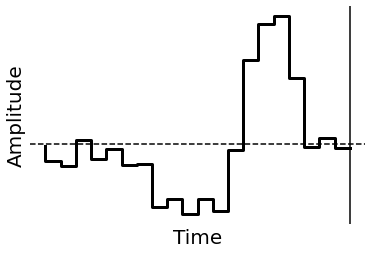

In [10]:
fig=figure()
ax = fig.add_subplot(1,1, 1)
t=np.arange(21)
plt.step(t,matdata['Temporal'][:,147], lw=3, color ='k')
plt.xticks([])
plt.axhline(y=0, linestyle='--', color='k', label='0')
plt.axvline(x=20, color='k')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# plt.axis('off')
plt.xlabel('Time',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)
#ax.set_xticklabels(['','','','','','','','','','','','','','','','','','',0],visible=True)
#ax.set_yticklabels([])
plt.yticks([])

#plt.savefig('263_temporal.png')
#labels = [tick.get_text() for tick in plt.get_xticks()]
# matdata['Temporal'][:,148].shape

# Make LSTA s1200

In [16]:
pkls = []
pknames = []
pkcount=0

#pkldirs = rootf + r'\OneDrive\Desktop\Data analysis\Exp_mea_01\analysis\pert_DATA\pckls_s1200_times'
pkldirs = '/media/eqs8/Samuele_01/Exp_13/analysis/Sam_analysis_trial/s1200_rasters'
#here is the folder where there are the pickles of the rasters of the stimulus

#-----------------------------------------------
# Here I load all the pickles names
# we make the list of names, and the list of address to open
#-----------------------------------------------

pks = getfiles(startdir=pkldirs, phrase='.pkl', function='endswith')

for pk in pks:
    pkls.append(pk)

pkls = sorted(pkls)

for pk in pkls[:]:
    #pknames.append((pk.split('\\')[-1].split('_s1200_times.pkl')[0]))
    pknames.append((pk.split('/')[-1].split('_s1200_times.pkl')[0]))
    
pkcount = len(pkls)
print(pkcount)   
#print(pknames[38:])

#-----------------------------------------------
# Here I load all the pertrubation folder
#-----------------------------------------------

#patFolder = rootf + r'\OneDrive\Desktop\Data analysis\Exp_mea_01\STIMS_pert\fipwrc_6imgs&grey_1200reps\patterns'
patFolder = "/home/eqs8/Data_analysis/Exp_mea_11/analysis/stim2_6&grayfipwrc1200/patterns"

163


In [17]:
stim_index = 1   # measurement number -1
#-----------------
# Get start times and make rasters
#-----------
# Get stim trials

#stimF = rootf + r'\OneDrive\Desktop\Data analysis\Exp_mea_01\STIMS_pert\fipwrc_6imgs&grey_1200reps'
stimF ='/home/eqs8/Data_analysis/Exp_mea_11/analysis/stim2_6&grayfipwrc1200/'
#the folder were there is the csv with the stimulus trials

stim_trials_f= open(stimF + '20210205-fi_merge_fipwrc_trials.csv')
stim_trials_f = csv.reader(stim_trials_f,delimiter=",")

stim_trials=[]
for row in stim_trials_f:
    stim_trials.append(np.array(row))

stim_trials_head = stim_trials[0]
stim_trials = np.array(stim_trials[1:]).astype(double)
print(stim_trials_head)


#-------------------------------
#convert to times with trigtimes
trigs = Trigs[stim_index]

for st in stim_trials:
    st[2]=trigs[int(st[2])]
    st[3]=trigs[int(st[3])+1]

##stim_trials[:,2]=stim_trials[:,2]/frate
##stim_trials[:,3]=(stim_trials[:,3]+1)/frate
#Es. st=stim_trials[60]
print(stim_trials[60])
print(trigs[int(stim_trials[60][2])])
print(trigs[int(stim_trials[60][3])+1])

#-----------
# Get conditions

stim_cond_f= open(stimF + '20210205-fipwrc_conditions.csv')
stim_cond_f = csv.reader(stim_cond_f,delimiter=",")

stim_cond={}
stim_pattern={}
c=0
for row in stim_cond_f:
    if c==0:
        stim_cond_head = row
        c=1
    else:
        stim_cond[row[0]]= int(row[1])
        stim_pattern[row[0]]=int(row[2])

#print(stim_cond_head)

#---------------------
# Get images start times and pert_nb

pert_nb = np.zeros([7,1200])
im_starts= np.zeros([7,1200])
im_patterns=np.zeros([7,1200])

im_count = np.zeros(7,dtype='int')

for stim in stim_trials:
    condition = int(stim[1])
    im_nb =  int(stim_cond[str(condition)])
    pattern = int(stim_pattern[str(condition)])

    im_starts[im_nb,im_count[im_nb]] = stim[2]

    im_patterns[im_nb,im_count[im_nb]]= pattern
    
    im_count[im_nb]+=1


['' 'condition_nb' 'start_display_nb' 'end_display_nb']
[  60.      7850.      3760.69295 3760.99295]
3743.693
3743.7180000000003


In [21]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm


#PDF_folder = rootf +r'\OneDrive\Desktop\Data analysis\Exp_mea_01\analysis\OUTPUT_pert\LSTAs\s1200'
PDF_folder = '/media/eqs8/Samuele_01/Exp_13/analysis/Sam_analysis_trial/'

PLOT=True
ZOOM = True
SKIP=True

patim_size = 72
nb_rep = 1200
frate = 40
print('N rep: ',nb_rep)
raster_len = 0.6

clus = 698

cmap = 'gray'
#cmap='bwr'
#interp='gaussian'
#interp='none'
interp='catrom'
# methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
#            'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
#            'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
#-------------------------------------    
picklename = 'exp13_m2_c'+str(clus)
if SKIP:
    i0=np.where(np.array(pknames)==picklename)[0][0]
    iz=i0+1
else:
    i0=0
    iz=len(pknames)
#-------------------------------------    

i=i0
for pk in pkls[i0:iz]:
    
    clus=pknames[i]
    print('cluster ',clus)
    #Get raster_times
    raster = load_obj(pk)
    
    spcount = np.zeros([7],dtype='int')
    lsta=np.zeros([7,patim_size,patim_size])
    #----------------------
    # figure
    if PLOT:
        fig = figure(figsize=(10,10))
        subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)
    #----------------------
    shiftim=0
    for im in np.arange(7):
        if im==1:shiftim=2
        ax =fig.add_subplot(3,3,im+1+shiftim)
#         ax =fig.add_subplot(1,1,1)
        
        for pat in np.arange(nb_rep):
            #-----------------
            #load pattern
            pat_nb = int(im_patterns[im,pat])
            pat_img_file = patFolder + '/pattern_'+str(pat_nb)+'_data.npy'
            pat_img = load(pat_img_file)
            pat_img = pat_img[:,::-1].T
            #-----------------
            
            spcount_imrep = len( raster[pat][ (raster[pat]>=0.6*im+0.03) & (raster[pat]<0.6*(im+1)-0.3+0.05) ] )
#             print(spcount_imrep)
            lsta[im]+=pat_img * spcount_imrep
            
            spcount[im]+=spcount_imrep
            
        lsta[im]=np.divide(lsta[im],spcount[im])
            
        vmax= np.max([np.amax(lsta[im]),-np.amin(lsta[im])])   *1
        
        if PLOT:
            im=ax.imshow(lsta[im],cmap=cmap,vmax=vmax,vmin=-vmax,interpolation=interp)
            # create an axes on the right side of ax. The width of cax will be 5%
            # of ax and the padding between cax and ax will be fixed at 0.05 inch.
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="10%", pad=0.15)
            colorbar(im, cax=cax,ticks=[-1,0.0,1])
            
            fontprops = fm.FontProperties(size=12)
            scalebar = AnchoredSizeBar(ax.transData,
                           4.76, r'200 $\mu m$', 'lower left', 
                           pad=0.1,
                           color='white',
                           frameon=False,
                           size_vertical=1,
                           fontproperties=fontprops)

            ax.add_artist(scalebar)
            
            ax.set_xticks([])
            ax.set_yticks([])
            clus_nb = int(clus.split('_c')[1])
            
            
            coor = np.array(RF_fit[clus_nb][0])*73/60   #56/50
            Xell,Yell=np.array((RF_fit[clus_nb][1]))*73/60   #56/50
            
            ellipse_scale=1
            #ellipse_scale=2.5
            #Xell = (Xell-coor[0])*6+coor[0]
            #Yell = (Yell-coor[1])*6+coor[1]
            Xell = (Xell-coor[0])*ellipse_scale+coor[0]
            Yell = (Yell-coor[1])*ellipse_scale+coor[1]
            
            ax.plot(Xell,Yell,'w',lw=2)
            if ZOOM:
                shift=10
                x0 =coor[0]
                y0 = coor[1]
                ax.set_xlim([x0-shift,x0+shift])
                ax.set_ylim([y0+shift,y0-shift])
                
#         ax.plot(coor[0],coor[1],'+',markersize=5,color='k')
    #------------------------
    # save lsta
#     saveF = rootf+ '/matias/Dropbox/Drop-IdV/git-Perturbation/pyretina/analysis/pert_DATA/pckls_s600_times/'
#     codename = 'exp'+str(exp)+'_m'+str(stim_index+1)+'_c' +str(clus)
#     savef = saveF + codename  +'_s600_times'  
#     save_obj(ch_raster,savef)
    
    #------------------------                    
    if PLOT:
        if ZOOM:
            fsave = PDF_folder +str(clus) +'_s1200_lsta_zoom_{0}'.format(interp) 
        else:
            #fsave = PDF_folder + '/' +str(clus) +'_s1200_lsta'
            fsave = PDF_folder + '/' +str(clus) +'_s1200_lsta_normell'
        fig.savefig(fsave+'.png',format='png',dpi=110)
        close(fig)  
        
    i+=1
    

N rep:  1200
cluster  exp13_m2_c698


### Figure of LSTAs outside the RF for a grant

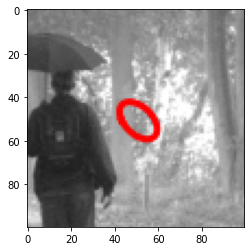

In [40]:
g=plt.imread('/media/eqs8/Samuele_01/Exp_13/analysis/Sam_analysis_trial/clus{0}_image{1}.png'.format(clusid[id],img))
plt.figure()
plt.imshow(g[230:330,310:410])

In [65]:
PDF_folder = '/media/eqs8/Samuele_01/Exp_13/analysis/Sam_analysis_trial/'

PLOT=True
ZOOM = True
SKIP=True

patim_size = 72
nb_rep = 1200
frate = 40
print('N rep: ',nb_rep)
raster_len = 0.6

cell = 698

cmap = 'gray'
#cmap='bwr'
#interp='gaussian'
#interp='none'
interp='catrom'
# methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
#            'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
#            'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
#-------------------------------------    
picklename = 'exp13_m2_c'+str(cell)
if SKIP:
    i0=np.where(np.array(pknames)==picklename)[0][0]
    iz=i0+1
else:
    i0=0
    iz=len(pknames)
#-------------------------------------    

i=i0
for pk in pkls[i0:iz]:
    
    clus=pknames[i]
    print('cluster ',clus)
    #Get raster_times
    raster = load_obj(pk)
    
    spcount = np.zeros([7],dtype='int')
    lsta=np.zeros([7,patim_size,patim_size])
    #----------------------
    # figure
    if PLOT:
        fig, axs = plt.subplots(2, 3)
    #----------------------
    g=plt.imread('/media/eqs8/Samuele_01/Exp_13/analysis/Sam_analysis_trial/clus{0}_image{1}.png'.format(cell,3))
    axs[0, 0].imshow(g[230:330,310:410])
    axs[0,0].set_xticks([])
    axs[0,0].set_yticks([])
    h=plt.imread('/media/eqs8/Samuele_01/Exp_13/analysis/Sam_analysis_trial/clus{0}_image{1}.png'.format(cell,5))
    axs[0, 1].imshow(h[230:330,310:410])
    axs[0,1].set_xticks([])
    axs[0,1].set_yticks([])
    j=plt.imread('/media/eqs8/Samuele_01/Exp_13/analysis/Sam_analysis_trial/clus{0}_image{1}.png'.format(cell,6))
    axs[0, 2].imshow(j[230:330,310:410])
    axs[0,2].set_xticks([])
    axs[0,2].set_yticks([])
    for k,im in enumerate([3,5,6]):
        ax=axs[1,k]
        for pat in np.arange(nb_rep):
            #-----------------
            #load pattern
            pat_nb = int(im_patterns[im,pat])
            pat_img_file = patFolder + '/pattern_'+str(pat_nb)+'_data.npy'
            pat_img = load(pat_img_file)
            pat_img = pat_img[:,::-1].T
            #-----------------
            
            spcount_imrep = len( raster[pat][ (raster[pat]>=0.6*im+0.03) & (raster[pat]<0.6*(im+1)-0.3+0.05) ] )
#             print(spcount_imrep)
            lsta[im]+=pat_img * spcount_imrep
            
            spcount[im]+=spcount_imrep
            
        lsta[im]=np.divide(lsta[im],spcount[im])
            
        vmax= np.max([np.amax(lsta[im]),-np.amin(lsta[im])])   *1
        
        if PLOT:
            im=ax.imshow(lsta[im],cmap=cmap,vmax=vmax,vmin=-vmax,interpolation=interp)
            # create an axes on the right side of ax. The width of cax will be 5%
            # of ax and the padding between cax and ax will be fixed at 0.05 inch.
            '''
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="10%", pad=0.15)
            colorbar(im, cax=cax,ticks=[-1,0.0,1])

            fontprops = fm.FontProperties(size=12)
            scalebar = AnchoredSizeBar(ax.transData,
                           4.76, r'200 $\mu m$', 'lower left', 
                           pad=0.1,
                           color='white',
                           frameon=False,
                           size_vertical=1,
                           fontproperties=fontprops)

            ax.add_artist(scalebar)
'''
            ax.set_xticks([])
            ax.set_yticks([])
            clus_nb = int(clus.split('_c')[1])


            coor = np.array(RF_fit[clus_nb][0])*73/60   #56/50
            Xell,Yell=np.array((RF_fit[clus_nb][1]))*73/60   #56/50

            ellipse_scale=1
            #ellipse_scale=2.5
            #Xell = (Xell-coor[0])*6+coor[0]
            #Yell = (Yell-coor[1])*6+coor[1]
            Xell = (Xell-coor[0])*ellipse_scale+coor[0]
            Yell = (Yell-coor[1])*ellipse_scale+coor[1]

            ax.plot(Xell,Yell,'green',lw=2)
            if ZOOM:
                shift=10
                x0 =coor[0]
                y0 = coor[1]
                ax.set_xlim([x0-shift,x0+shift])
                ax.set_ylim([y0+shift,y0-shift])
                                
    if PLOT:
        if ZOOM:
            fsave = PDF_folder +str(clus) +'_outsideRF_lsta_zoom_{0}'.format(interp) 
        else:
            #fsave = PDF_folder + '/' +str(clus) +'_s1200_lsta'
            fsave = PDF_folder + '/' +str(clus) +'_outsideRF_lsta'
        fig.savefig(fsave+'.png',format='png',dpi=110)
        close(fig)  
        
    i+=1
    

N rep:  1200
cluster  exp13_m2_c202


## Single image rasters s1200

In [143]:
exp=11


if WIND: rootF =rootf+r'\OneDrive\Desktop\Data analysis\Exp_mea_07\exp7-meas_01\exp7-meas_01.GUI'
#here I need to put the folder in which I have the results of my sorting
else: rootF = '/home/eqs8/Data_analysis/Exp_mea_11/exp11-meas_01/exp11-meas_01.GUI'

spike_times= load(rootF + '/spike_times.npy')

spike_clusters= load(rootF + '/spike_clusters.npy')  


import csv as csv
cgf = open(rootF + '/cluster_group.tsv')  
cgfr = csv.reader(cgf,delimiter="\t") 
cluster_group = dict()
next(cgfr)
for row in cgfr:
    cluster_group[row[0]]=row[1]
Clusters =np.array(list(cluster_group.keys()),dtype='int')

In [141]:
stim_index = 1   # measurement number -1
#-----------------
# Get start times and make rasters
#-----------
# Get stim trials

stimF ='/home/eqs8/Data_analysis/Exp_mea_11/analysis/stim2_6&grayfipwrc1200/'
#stimF = rootf + r'\OneDrive\Desktop\Data analysis\Exp_mea_01\STIMS_pert\fipwrc_6imgs&grey_1200reps'

stim_trials_f= open(stimF + '20210205-fi_merge_fipwrc_trials.csv')
#stim_trials_f= open(stimF + '/fipwrc_trials.csv')
stim_trials_f = csv.reader(stim_trials_f,delimiter=",")

stim_trials=[]
for row in stim_trials_f:
    stim_trials.append(np.array(row))

stim_trials_head = stim_trials[0]
stim_trials = np.array(stim_trials[1:]).astype(double)
print(stim_trials_head)


#-------------------------------
#convert to times with trigtimes
trigs = Trigs[stim_index]
if stim_index==1: trigs = np.concatenate((Trigs[1], -np.ones((301429-(Trigs[stim_index].shape)[0])))) #froze fix

for st in stim_trials:
    st[2]=trigs[int(st[2])]
    st[3]=trigs[int(st[3])+1]

#stim_trials[:,2]=stim_trials[:,2]/frate
#stim_trials[:,3]=(stim_trials[:,3]+1)/frate

#-----------
# Get conditions

#stim_cond_f= open(stimF + '/fipwrc_conditions.csv')
stim_cond_f= open(stimF + '20210205-fipwrc_conditions.csv')
stim_cond_f = csv.reader(stim_cond_f,delimiter=",")

stim_cond={}
stim_pattern={}
c=0
for row in stim_cond_f:
    if c==0:
        stim_cond_head = row
        c=1
    else:
        stim_cond[row[0]]= int(row[1])
        stim_pattern[row[0]]=int(row[2])

print(stim_cond_head)

#---------------------
# Get images start times and pert_nb

pert_nb = np.zeros([7,1200])
im_starts= np.zeros([7,1200])
im_patterns=np.zeros([7,1200])

im_count = np.zeros(7,dtype='int')

for stim in stim_trials:
    condition = int(stim[1])
    im_nb =  int(stim_cond[str(condition)])
    pattern = int(stim_pattern[str(condition)])

    im_starts[im_nb,im_count[im_nb]] = stim[2]

    im_patterns[im_nb,im_count[im_nb]]= pattern
    
    im_count[im_nb]+=1


['' 'condition_nb' 'start_display_nb' 'end_display_nb']
['', 'image_nb', 'pattern_nb']


In [172]:
PDF_folder = '/home/eqs8/Data_analysis/Exp_mea_11/analysis/temp/'
PLOT = True

nb_rep = 1200
frate = 40
print('N rep: ',nb_rep)
raster_len = 0.6

clus = 388
im=6

SKIP=True
if SKIP:
    i0=np.where(clus==Clusters)[0][0]
    iz=i0+1
else:
    i0=0
    iz=len(cluster_group.keys())


for i in np.arange(i0,iz):
    
    clus=Clusters[i]
    #print(clus,i)
    
    if cluster_group[str(clus)]=='mua' or cluster_group[str(clus)]=='noise' :continue
        
    print('cluster ',clus)
    
    #Get spike_times
    sp_times = spike_times[spike_clusters==int(clus)]/fs
    print('Nspikes: ',len(sp_times))

    stim_sptimes = sp_times[(sp_times>Mtimes[stim_index]) & (sp_times<Mtimes[stim_index+1])]

    print('sptimes in stim: ',len(stim_sptimes), '   % spikes: ' ,round(len(stim_sptimes)/len(sp_times)*100,1))
    
    
    #---------------  
    # Get start times and make rasters
    if PLOT:
        fig = figure(figsize=(4,4))
        subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
        ax =fig.add_subplot(1,1,1)
    
    ch_raster = [] 
    
    ax.axvline(0.6,color='k')
    ax.axvline(0.3,color='red',linestyle='--',lw=0.5)

    for n in np.arange(nb_rep):
        rep_sptimes = stim_sptimes[(im_starts[im,n]<stim_sptimes)&(stim_sptimes<im_starts[im,n]+raster_len)]
        ch_raster.append(rep_sptimes-im_starts[im,n])

    #------------------------                    
    if PLOT:
        ax.eventplot(ch_raster,lw=2,color='k',linelengths=5)

        ax.set_xlim([0,raster_len])
        ax.set_ylim([0,nb_rep-1])
        #ax.set_title('cluster '+str(clus))#+' - image '+str(im))
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Pattern number')

        fsave = PDF_folder + 'clus' +str(clus) +'_s1200_raster_image{0}'.format(im) 
        #fsave = PDF_folder + '/clus' +str(clus) +'_s1200_raster' 
        fig.savefig(fsave+'.png',format='png',dpi=110)
        close(fig)

N rep:  1200
cluster  388
Nspikes:  134245
sptimes in stim:  41561    % spikes:  31.0
